In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
population_data = pd.read_csv(r"C:\Users\HP\Documents\Data science\API_SP.POP.TOTL_DS2_en_csv_v2_900.csv")
population_data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54922.0,55578.0,56320.0,57002.0,57619.0,58190.0,...,106807.0,107906.0,108727.0,108735.0,108908.0,109203.0,108587.0,107700.0,107310.0,107359.0
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130072080.0,133534923.0,137171659.0,140945536.0,144904094.0,149033472.0,...,590968990.0,607123269.0,623369401.0,640058741.0,657801085.0,675950189.0,694446100.0,713090928.0,731821393.0,750503764.0
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,9035043.0,9214083.0,9404406.0,9604487.0,9814318.0,10036008.0,...,32792523.0,33831764.0,34700612.0,35688935.0,36743039.0,37856121.0,39068979.0,40000412.0,40578842.0,41454761.0
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,97630925.0,99706674.0,101854756.0,104089175.0,106388440.0,108772632.0,...,406992047.0,418127845.0,429454743.0,440882906.0,452195915.0,463365429.0,474569351.0,485920997.0,497387180.0,509398589.0
4,Angola,AGO,"Population, total",SP.POP.TOTL,5231654.0,5301583.0,5354310.0,5408320.0,5464187.0,5521981.0,...,27160769.0,28157798.0,29183070.0,30234839.0,31297155.0,32375632.0,33451132.0,34532429.0,35635029.0,36749906.0


In [3]:
country_metadata = pd.read_csv(r"C:\Users\HP\Documents\Data science\Metadata_Country_API_SP.POP.TOTL_DS2_en_csv_v2_900.csv")
country_metadata.drop(columns = ['Unnamed: 5', 'SpecialNotes', 'TableName'], inplace = True)
country_metadata

,Country Code,Region,IncomeGroup
0,ABW,Latin America & Caribbean,High income
1,AFE,NaN,NaN
2,AFG,South Asia,Low income
3,AFW,NaN,NaN
4,AGO,Sub-Saharan Africa,Lower middle income
...,...,...,...
260,XKX,Europe & Central Asia,Upper middle income
261,YEM,Middle East & North Africa,Low income
262,ZAF,Sub-Saharan Africa,Upper middle income
263,ZMB,Sub-Saharan Africa,Lower middle income


In [4]:
population_data.isna().sum()

Country Name      0
Country Code      0
Indicator Name    0
Indicator Code    0
1960              2
                 ..
2019              1
2020              1
2021              1
2022              1
2023              1
Length: 68, dtype: int64

In [5]:
updated_data = pd.merge(population_data, country_metadata, on = 'Country Code', how = 'left')
updated_data.drop(columns = ['Indicator Name', 'Indicator Code'], inplace = True)
updated_data.sample(10)

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2016,2017,2018,2019,2020,2021,2022,2023,Region,IncomeGroup
153,Middle East & North Africa,MEA,103189039.0,105933296.0,108830401.0,111829018.0,114934365.0,118116077.0,121421021.0,124943855.0,...,4.521849e+08,4.599257e+08,4.666911e+08,4.740576e+08,4.823344e+08,4.881006e+08,4.980703e+08,5.083114e+08,NaN,NaN
48,Costa Rica,CRI,1327496.0,1377920.0,1429445.0,1481604.0,1533960.0,1586208.0,1638116.0,1689523.0,...,4.866998e+06,4.913177e+06,4.957818e+06,4.999553e+06,5.034320e+06,5.059988e+06,5.081765e+06,5.105525e+06,Latin America & Caribbean,Upper middle income
117,Jamaica,JAM,1650005.0,1673261.0,1696932.0,1721099.0,1745568.0,1769192.0,1791475.0,1812865.0,...,2.809915e+06,2.815764e+06,2.820097e+06,2.823271e+06,2.830739e+06,2.837682e+06,2.839144e+06,2.839786e+06,Latin America & Caribbean,Upper middle income
90,Grenada,GRD,94058.0,95335.0,96375.0,97195.0,97760.0,98067.0,98121.0,98066.0,...,1.151300e+05,1.154380e+05,1.156910e+05,1.159810e+05,1.163410e+05,1.166880e+05,1.169130e+05,1.170810e+05,Latin America & Caribbean,Upper middle income
150,Moldova,MDA,2058020.0,2103327.0,2147227.0,2188895.0,2228000.0,2265287.0,2301871.0,2337695.0,...,2.803186e+06,2.755189e+06,2.707203e+06,2.664224e+06,2.635130e+06,2.595809e+06,2.528654e+06,2.457783e+06,Europe & Central Asia,Upper middle income
29,Brazil,BRA,72388126.0,74605447.0,76865323.0,79164235.0,81488595.0,83817583.0,86139359.0,88446124.0,...,2.032181e+08,2.047034e+08,2.061073e+08,2.074555e+08,2.086608e+08,2.095503e+08,2.103064e+08,2.111407e+08,Latin America & Caribbean,Upper middle income
116,Italy,ITA,50199700.0,50536350.0,50879450.0,51252000.0,51675350.0,52112350.0,52519000.0,52900500.0,...,6.062750e+07,6.053671e+07,6.042176e+07,5.972908e+07,5.943885e+07,5.913317e+07,5.901367e+07,5.899348e+07,Europe & Central Asia,High income
170,North America,NAC,198622564.0,202005123.0,205196239.0,208251340.0,211260410.0,214028461.0,216656534.0,219173514.0,...,3.592460e+08,3.617308e+08,3.639746e+08,3.660126e+08,3.696200e+08,3.703535e+08,3.722752e+08,3.750774e+08,NaN,NaN
204,South Asia,SAS,562663671.0,576552257.0,590723078.0,605163476.0,619975727.0,634743361.0,649326080.0,664339452.0,...,1.809951e+09,1.831474e+09,1.852837e+09,1.874070e+09,1.895144e+09,1.914264e+09,1.932289e+09,1.951540e+09,NaN,NaN
44,"Congo, Rep.",COG,1056732.0,1084389.0,1113175.0,1143263.0,1174816.0,1207880.0,1242534.0,1278691.0,...,5.222536e+06,5.351011e+06,5.483118e+06,5.616661e+06,5.752791e+06,5.892183e+06,6.035104e+06,6.182885e+06,Sub-Saharan Africa,Lower middle income


In [6]:
updated_data['Region'].unique()

array(['Latin America & Caribbean', nan, 'South Asia',
       'Sub-Saharan Africa', 'Europe & Central Asia',
       'Middle East & North Africa', 'East Asia & Pacific',
       'North America'], dtype=object)

In [7]:
updated_data['Region'] = updated_data['Region'].fillna('Others')

In [8]:
updated_data['IncomeGroup'].unique()

array(['High income', nan, 'Low income', 'Lower middle income',
       'Upper middle income'], dtype=object)

In [9]:
updated_data['IncomeGroup'] = updated_data['IncomeGroup'].fillna('Others')

In [10]:
updated_data.sample(10)

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2016,2017,2018,2019,2020,2021,2022,2023,Region,IncomeGroup
184,Pakistan,PAK,45709310.0,46921277.0,48156128.0,49447776.0,50799999.0,52209010.0,53678667.0,55214768.0,...,220138869.0,223273967.0,226928892.0,230800899.0,235001746.0,239477801.0,243700667.0,247504495.0,South Asia,Lower middle income
263,South Africa,ZAF,16440172.0,16908035.0,17418522.0,17954564.0,18511361.0,19089380.0,19690087.0,20314066.0,...,57259551.0,57635162.0,58613001.0,59587885.0,60562381.0,61502603.0,62378410.0,63212384.0,Sub-Saharan Africa,Upper middle income
190,Poland,POL,29637450.0,29964000.0,30308500.0,30712000.0,31139450.0,31444950.0,31681000.0,31987155.0,...,37970087.0,37974826.0,37974750.0,37965475.0,37899070.0,36981559.0,36821749.0,36687353.0,Europe & Central Asia,High income
75,Finland,FIN,4429634.0,4461005.0,4491443.0,4523309.0,4548543.0,4563732.0,4580869.0,4605744.0,...,5495303.0,5508214.0,5515525.0,5521606.0,5529543.0,5541017.0,5556106.0,5583911.0,Europe & Central Asia,High income
200,Qatar,QAT,36010.0,39680.0,44630.0,50380.0,56867.0,64065.0,72192.0,81439.0,...,2477113.0,2545820.0,2580734.0,2638657.0,2794148.0,2504910.0,2657333.0,2656032.0,Middle East & North Africa,High income
216,South Sudan,SSD,2931559.0,2976724.0,3024308.0,3072669.0,3129918.0,3189835.0,3236423.0,3277648.0,...,10830102.0,10259154.0,10122977.0,10423384.0,10698467.0,10865780.0,11021177.0,11483374.0,Sub-Saharan Africa,Low income
153,Middle East & North Africa,MEA,103189039.0,105933296.0,108830401.0,111829018.0,114934365.0,118116077.0,121421021.0,124943855.0,...,452184895.0,459925735.0,466691130.0,474057593.0,482334398.0,488100624.0,498070255.0,508311359.0,Others,Others
171,Namibia,NAM,591465.0,603067.0,615759.0,629589.0,644530.0,660558.0,677655.0,696045.0,...,2439213.0,2506853.0,2577327.0,2650494.0,2728762.0,2810548.0,2889662.0,2963095.0,Sub-Saharan Africa,Upper middle income
58,Denmark,DNK,4579603.0,4611687.0,4647727.0,4684483.0,4722072.0,4759012.0,4797381.0,4835354.0,...,5728010.0,5764980.0,5793636.0,5814422.0,5831404.0,5856733.0,5903037.0,5946952.0,Europe & Central Asia,High income
123,Cambodia,KHM,5449966.0,5571168.0,5697558.0,5823010.0,5946178.0,6072289.0,6201232.0,6332944.0,...,15852803.0,16073372.0,16274522.0,16481304.0,16725474.0,16974305.0,17201724.0,17423880.0,East Asia & Pacific,Lower middle income


In [11]:
world_data = updated_data[updated_data['Country Name'] == 'World']
world_data = world_data.set_index('Country Name').drop(['Country Code', 'Region', 'IncomeGroup'], axis=1).transpose()
world_data = world_data.reset_index()
world_data.columns = ['Year', 'Population']
world_data

,Year,Population
0,1960,3.021529e+09
1,1961,3.062769e+09
2,1962,3.117373e+09
3,1963,3.184063e+09
4,1964,3.251253e+09
...,...,...
59,2019,7.776892e+09
60,2020,7.856139e+09
61,2021,7.921184e+09
62,2022,7.989982e+09


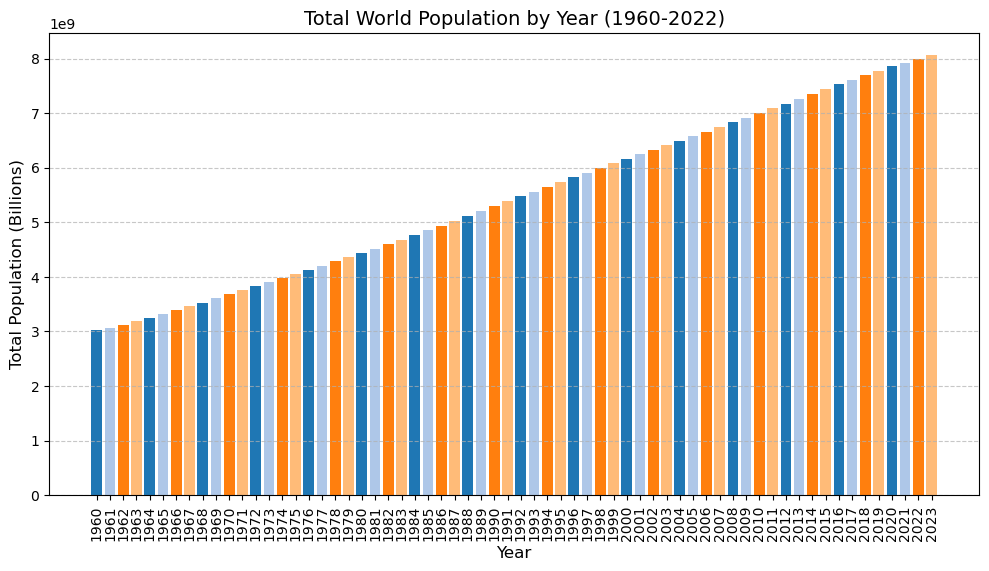

In [12]:
years = world_data['Year']
population = world_data['Population']

# Plotting
plt.figure(figsize=(12, 6))  # Adjusting figure size
plt.bar(years, population, color=plt.cm.tab20.colors[:len(years) % 20])  # Use a colormap for varied colors
plt.title("Total World Population by Year (1960-2022)", fontsize=14)  # Updated title
plt.xlabel("Year", fontsize=12)  # Correct x-label
plt.ylabel("Total Population (Billions)", fontsize=12)  # Correct y-label
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines to y-axis
plt.show()

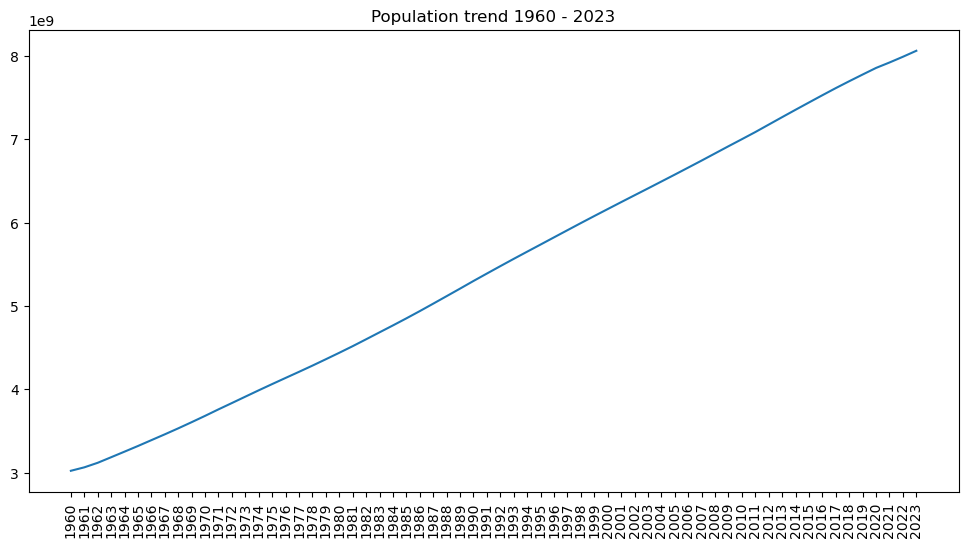

In [60]:
plt.figure(figsize=(12, 6))  # Adjusting figure size
plt.title('Population trend 1960 - 2023')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.plot(years, population)
plt.show()

In [25]:
years_columns = [str(year) for year in range(1960, 2024)]

In [26]:
region_summary = updated_data.groupby('Region')[years_columns].sum()
region_summary.drop('Others', inplace = True)

In [27]:
region_summary['Total'] = region_summary.sum(axis = 1)

In [29]:
region_summary = region_summary.sort_values('Total')
region_summary.head()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Total
Region,,,,,,,,,,,,,,,,,,,,,
Middle East & North Africa,103189039.0,105933296.0,108830401.0,111829018.0,114934365.0,118116077.0,121421021.0,124943855.0,128530890.0,132264295.0,...,4.431112e+08,4.521849e+08,4.599257e+08,4.666911e+08,4.740576e+08,4.823344e+08,4.881006e+08,4.980703e+08,5.083114e+08,1.760442e+10
North America,198622564.0,202005123.0,205196239.0,208251340.0,211260410.0,214028461.0,216656534.0,219173514.0,221500404.0,223756306.0,...,3.565070e+08,3.592460e+08,3.617308e+08,3.639746e+08,3.660126e+08,3.696200e+08,3.703535e+08,3.722752e+08,3.750774e+08,1.836918e+10
Latin America & Caribbean,218624695.0,224737321.0,231038261.0,237499676.0,244080552.0,250750949.0,257488362.0,264279682.0,271127278.0,278039112.0,...,6.188065e+08,6.246640e+08,6.303294e+08,6.356807e+08,6.408534e+08,6.454976e+08,6.492345e+08,6.531048e+08,6.576116e+08,2.865916e+10
Sub-Saharan Africa,227703005.0,233241597.0,239026415.0,245034711.0,251292534.0,257806104.0,264528156.0,271499400.0,278774032.0,286291766.0,...,1.025251e+09,1.052824e+09,1.080942e+09,1.109997e+09,1.139316e+09,1.169015e+09,1.199012e+09,1.229209e+09,1.259902e+09,3.897793e+10
Europe & Central Asia,667887811.0,675549997.0,683342108.0,691189404.0,699058435.0,706683416.0,713443573.0,720146318.0,726634174.0,733044421.0,...,9.084590e+08,9.125769e+08,9.162361e+08,9.197384e+08,9.228118e+08,9.250885e+08,9.250758e+08,9.253853e+08,9.249699e+08,5.292570e+10


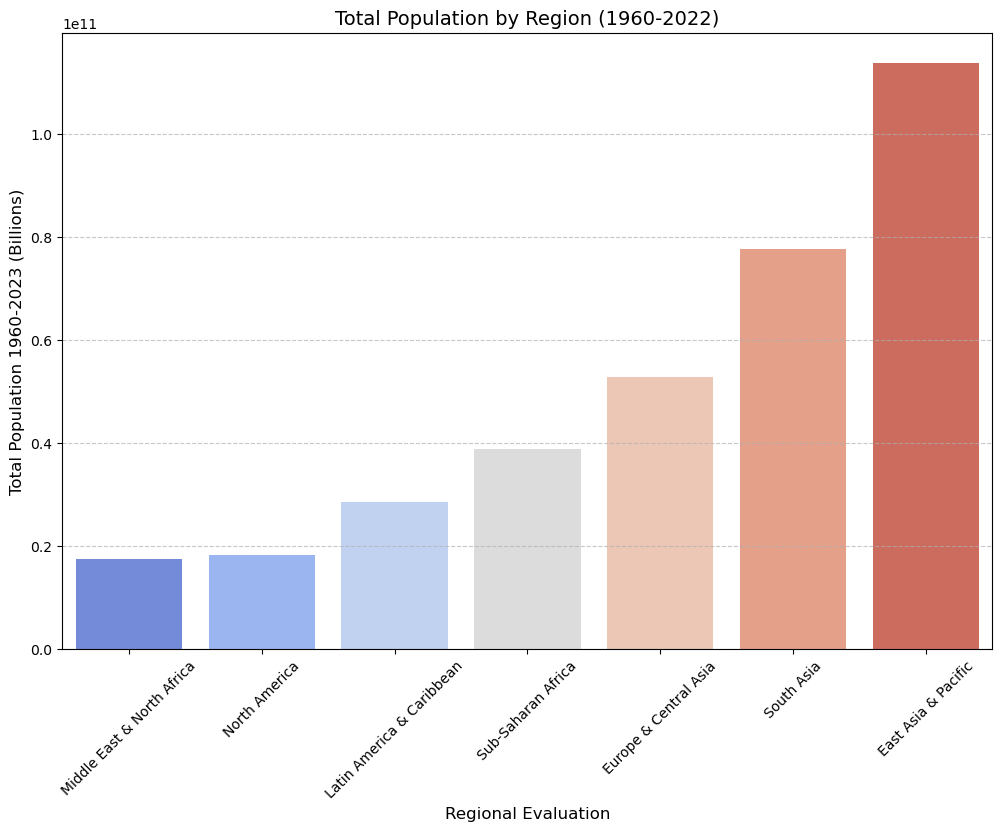

In [54]:
plt.figure(figsize=(12, 8))
plt.title("Total Population by Region (1960-2022)", fontsize=14)  # Updated title
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines to y-axis
plt.xlabel("Regional Evaluation", fontsize=12)  # Correct x-label
plt.ylabel("Total Population 1960-2023 (Billions)", fontsize=12)
sns.barplot(data = region_summary, x = 'Region', y = 'Total', hue = 'Region', palette = 'coolwarm')
plt.show()

In [35]:
income_group = updated_data.groupby('IncomeGroup')[years_columns].sum()
income_group['Total'] = income_group.sum(axis = 1)
income_group.drop('Others', inplace = True)
income_group = income_group.sort_values('Total')
income_group

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Total
IncomeGroup,,,,,,,,,,,,,,,,,,,,,
Low income,1.361257e+08,1.393553e+08,1.427126e+08,1.462055e+08,1.498701e+08,1.536988e+08,1.576600e+08,1.618295e+08,1.662003e+08,1.706662e+08,...,5.921754e+08,6.078675e+08,6.245570e+08,6.421862e+08,6.607184e+08,6.795607e+08,6.982152e+08,7.168658e+08,7.364664e+08,2.254861e+10
High income,8.962484e+08,9.070004e+08,9.179519e+08,9.288178e+08,9.397024e+08,9.502238e+08,9.595107e+08,9.686989e+08,9.776054e+08,9.865126e+08,...,1.337381e+09,1.345369e+09,1.351232e+09,1.355578e+09,1.359781e+09,1.365941e+09,1.363620e+09,1.369850e+09,1.377092e+09,7.430537e+10
Lower middle income,8.190472e+08,8.396491e+08,8.607403e+08,8.823720e+08,9.045288e+08,9.268145e+08,9.490863e+08,9.719382e+08,9.953527e+08,1.019093e+09,...,2.763351e+09,2.804867e+09,2.846134e+09,2.886705e+09,2.926691e+09,2.966397e+09,3.004163e+09,3.041204e+09,3.079779e+09,1.173890e+11
Upper middle income,1.151246e+09,1.157236e+09,1.175759e+09,1.205762e+09,1.235533e+09,1.265913e+09,1.299738e+09,1.332980e+09,1.367299e+09,1.403445e+09,...,2.694528e+09,2.716146e+09,2.738073e+09,2.758643e+09,2.777172e+09,2.792212e+09,2.803460e+09,2.810662e+09,2.816864e+09,1.325795e+11


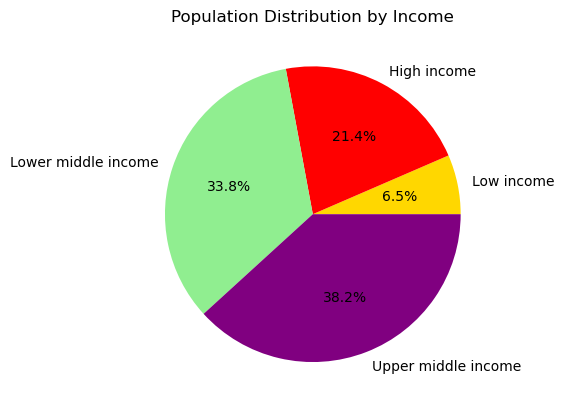

In [62]:
plt.pie(
    income_group['Total'], 
    labels=income_group.index, 
    autopct='%1.1f%%', 
    colors=['gold', 'red', 'lightgreen', 'purple']
)
plt.title('Population Distribution by Income')
plt.show()